## Unveiling Insights: Exploring Stack Overflow's 2017 Survey - Spotlight on Turkey

### Question 1: What's the Global Salary Landscape and Turkey's Position on the Global Stage?

In [359]:
# Import necessary libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import math
import os
import seaborn as sns
import geopandas as gpd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
%matplotlib inline

# Read the main survey data into a DataFrame
df = pd.read_csv('datasets/survey_results_public.csv')

# Read the schema data that describes the columns in the survey data
schema = pd.read_csv('datasets/survey_results_schema.csv')

# Read the country-to-continent matching data
match = pd.read_csv('datasets/country_cont_match.csv')

In [360]:
#Data columns and rows
print("Number of Column {}, Number of Row: {} in survey dataframe.".format(df.shape[1],df.shape[0]))

Number of Column 154, Number of Row: 51392 in survey dataframe.


There are lots of rows. That's why I have decided to analyze with a smaller dataset with less column.

In [361]:
# Subsetting relevant columns from the DataFrame
# Selecting columns: 'Salary', 'Country', 'Gender', and 'EmploymentStatus'
num_vars = df[['Salary', 'Country', 'Gender', 'EmploymentStatus','JobSatisfaction']]

# Display the first few rows of the subsetted DataFrame
print("Subsetted Data Preview:\n {}".format(num_vars.head()))

# Display summary statistics for the subsetted DataFrame
print("\nSummary Statistics: \n{}".format(num_vars.describe()))


Subsetted Data Preview:
      Salary         Country Gender                        EmploymentStatus  \
0       NaN   United States   Male  Not employed, and not looking for work   
1       NaN  United Kingdom   Male                      Employed part-time   
2  113750.0  United Kingdom   Male                      Employed full-time   
3       NaN   United States   Male                      Employed full-time   
4       NaN     Switzerland    NaN                      Employed full-time   

   JobSatisfaction  
0              NaN  
1              NaN  
2              9.0  
3              3.0  
4              8.0  

Summary Statistics: 
              Salary  JobSatisfaction
count   12891.000000     40376.000000
mean    56298.480641         6.957078
std     39880.905277         2.167652
min         0.000000         0.000000
25%     26440.371839         6.000000
50%     50000.000000         7.000000
75%     80000.000000         8.000000
max    197000.000000        10.000000


In [362]:
#Number of Different Answers for Each Category
for column in num_vars.columns:
    print("Number of options in {} is {}".format(column, num_vars[column].nunique()))

Number of options in Salary is 3049
Number of options in Country is 201
Number of options in Gender is 29
Number of options in EmploymentStatus is 7
Number of options in JobSatisfaction is 11


Lets look at the contributers' nationalities.

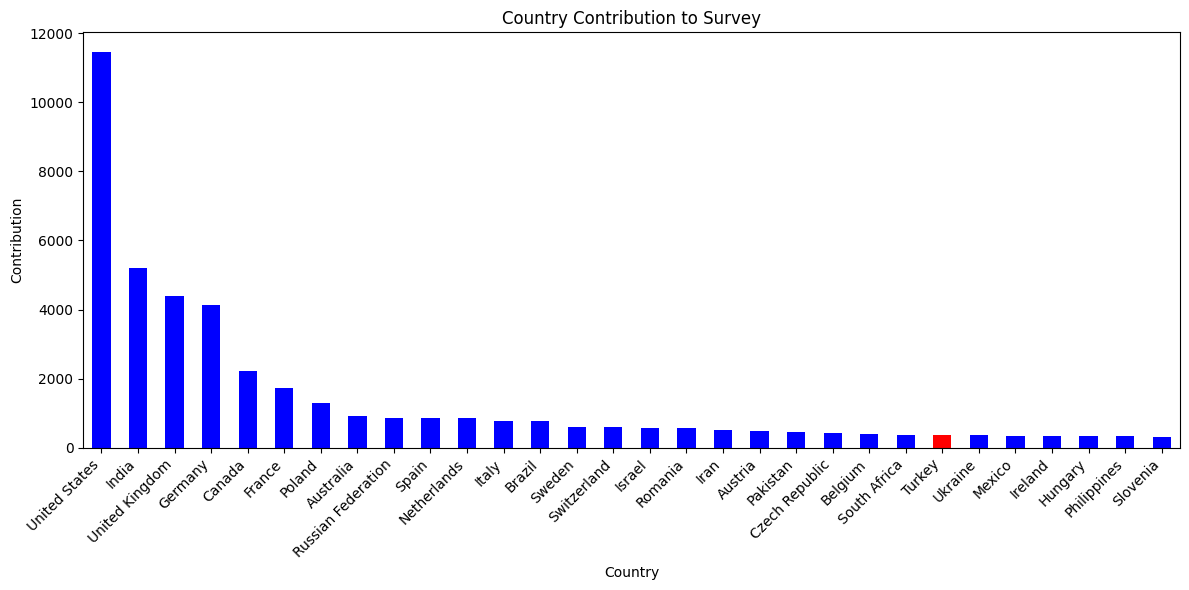

In [363]:
# Calculate average salary by country
country_counts = num_vars['Country'].value_counts().head(30)

#Highlight Turkey within data
default_color = 'blue'
highlight_color = 'red'
colors = [highlight_color if i == 23 else default_color for i in range(len(country_counts))]

# Create a bar plot using Matplotlib
plt.figure(figsize=(12, 6))
country_counts.plot(kind='bar', color=colors)
plt.xlabel('Country')
plt.ylabel('Contribution')
plt.title('Country Contribution to Survey')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Show the plot
plt.show()

Turkey is the 24th most contributing country. We see that United States, India, United Kingdom, Germany and Canada are on the lead.

I want to investigate lots of things. But first things first. Let's look at the salaries. Which coders gain more in which countries?

/tmp/ipykernel_684/3934878841.py:7: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  worldmap = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))


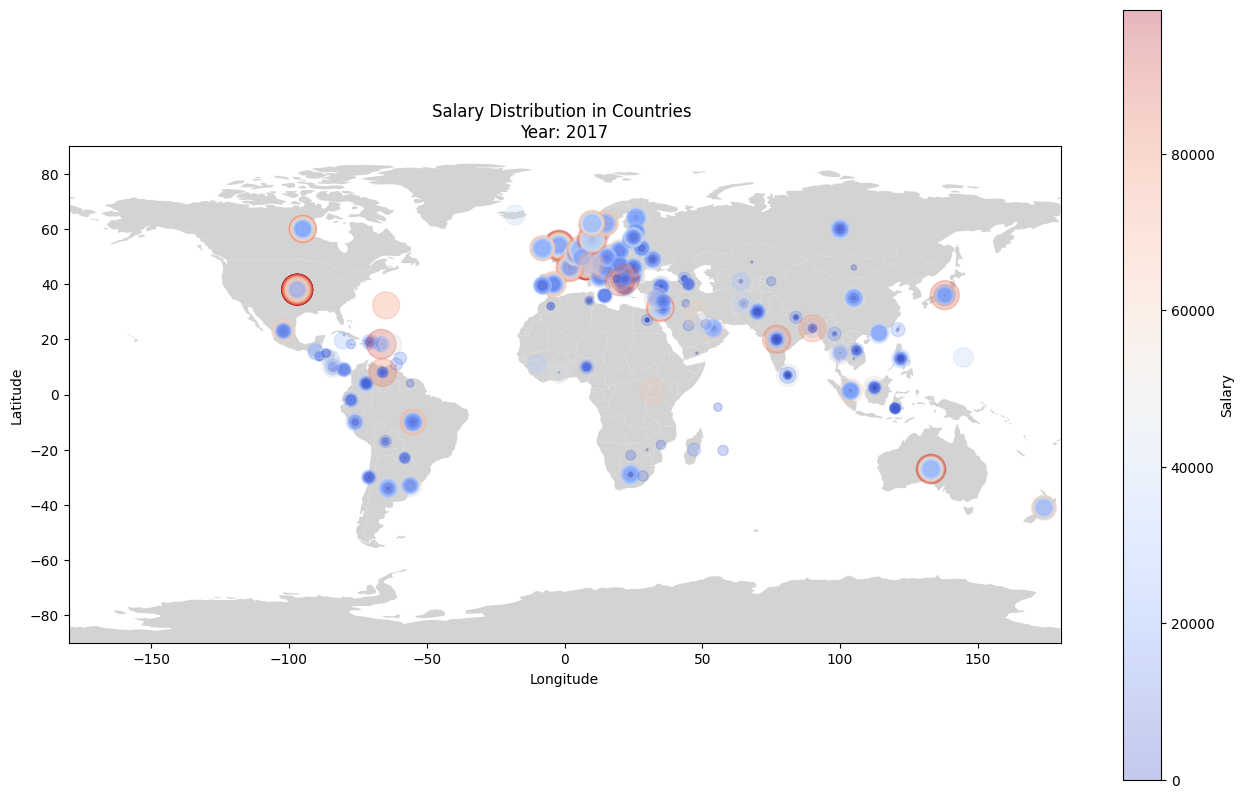

In [364]:
# Import necessary libraries
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt

# Load the world map geometries using GeoPandas
worldmap = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))

# Merge the main data with the country-to-continent matching data based on the 'Country' column
merged_df = pd.merge(num_vars, match, on='Country')

# Creating axes and plotting the world map
fig, ax = plt.subplots(figsize=(16, 10))
worldmap.plot(color="lightgrey", ax=ax)  # Plotting the base world map

# Plotting data points
x = merged_df['Longitude']
y = merged_df['Latitude']
z = merged_df['Salary']
plt.scatter(x, y, 
            s=0.0025*z,         # Size of points based on salary
            c=0.5*z,            # Color of points based on salary
            alpha=0.3,          # Transparency of points
            cmap='coolwarm'     # Colormap for coloring points
           )
plt.colorbar(label='Salary')  # Adding a colorbar to show salary scale

# Setting axis limits and adding title
plt.xlim([-180, 180])
plt.ylim([-90, 90])
plt.title("Salary Distribution in Countries \nYear: 2017")
plt.xlabel("Longitude")
plt.ylabel("Latitude")

# Display the plot
plt.show()

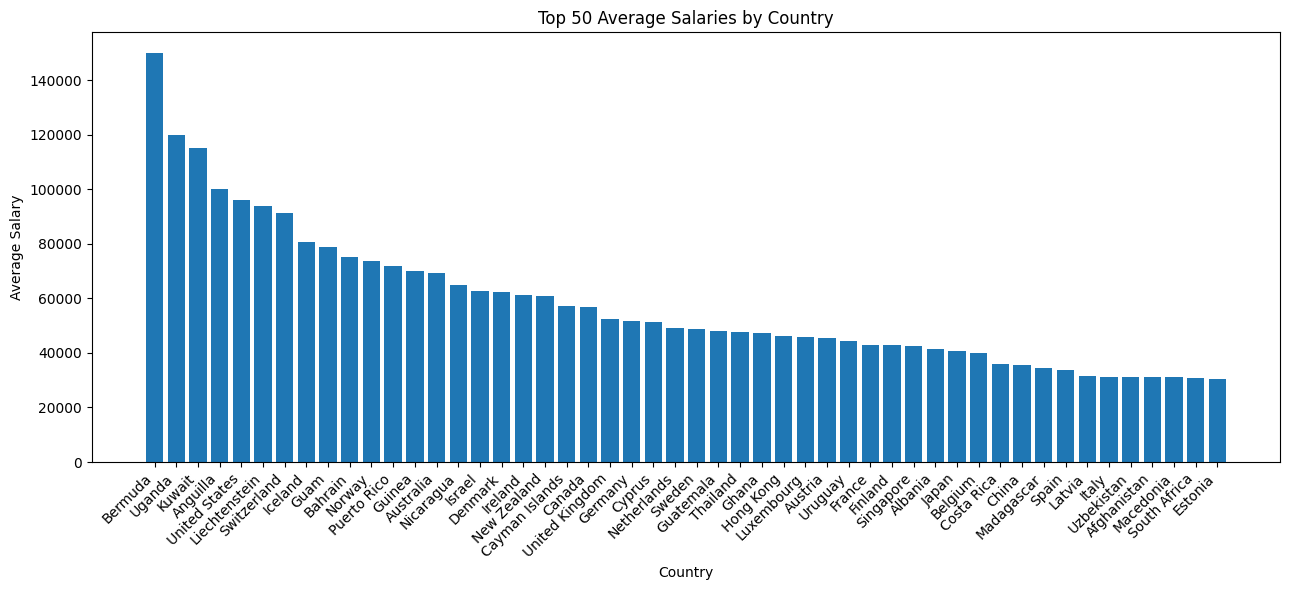

In [365]:
# Calculate the mean salary for each country by grouping the merged data
mean_salary_by_country = merged_df.groupby('Country')['Salary'].mean().reset_index()

# Sort the countries based on their average salary in descending order and select the top 50
sorted_top_countries = mean_salary_by_country.sort_values(by='Salary', ascending=False).head(50)

# Create a bar plot to visually represent the top 50 countries with the highest average salaries
import matplotlib.pyplot as plt  # Import the necessary library
plt.figure(figsize=(13, 6))  # Set the figure size for the plot
plt.bar(sorted_top_countries['Country'], sorted_top_countries['Salary'])  # Create the bar plot
plt.xlabel('Country')  # Set the label for the x-axis
plt.ylabel('Average Salary')  # Set the label for the y-axis
plt.title('Top 50 Average Salaries by Country')  # Set the title of the plot
plt.xticks(rotation=45, ha='right')  # Rotate and align the x-axis labels for better readability
plt.tight_layout()  # Adjust the layout for better spacing

# Display the created plot
plt.show()


It is again showed that ignoring some small countries, United States is on the lead. **But where is the Turkey?**. It was on top 30 in the contribution. **Seems strange!**

Let's look at the European zone to get a better insight.

In [366]:
#By the way, the average of Turkey's Salary is :
num_vars[num_vars['Country'] == "Turkey"]['Salary'].mean()

18412.46941243999

/tmp/ipykernel_684/2798066883.py:2: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  worldmap = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))


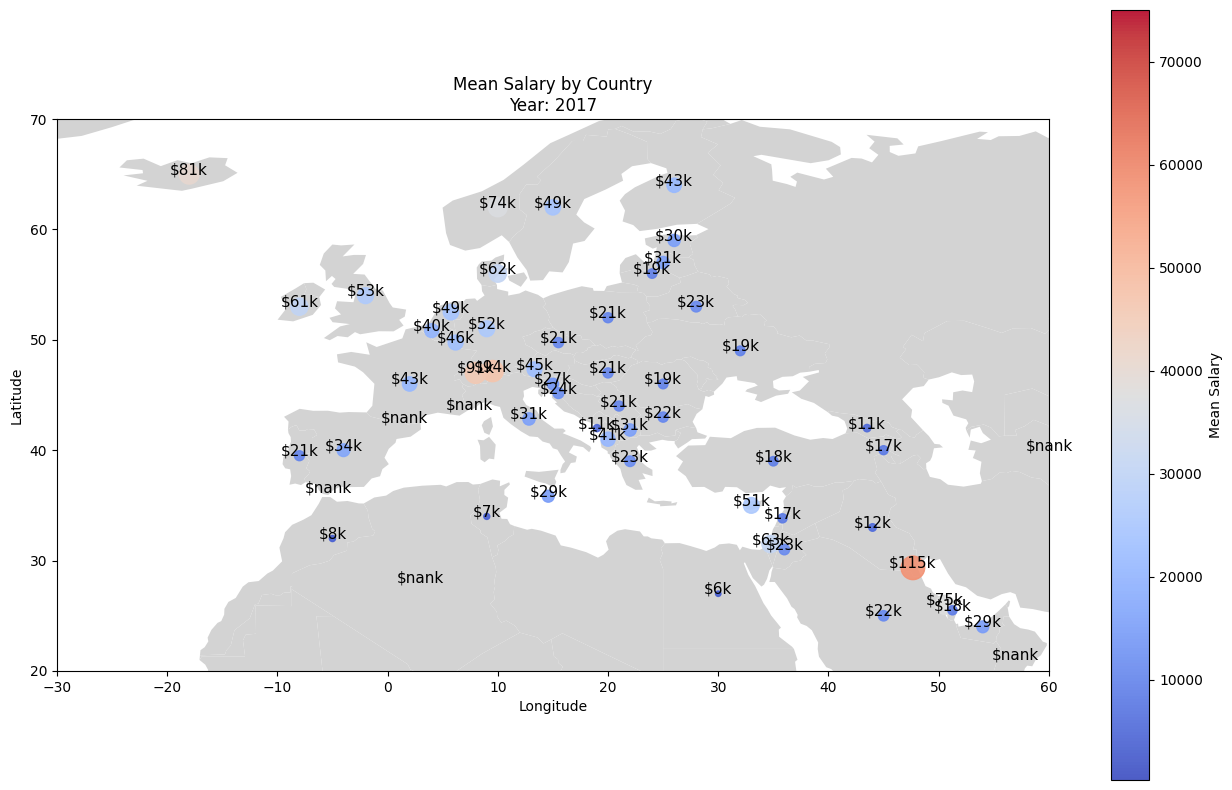

In [367]:
# Load the world map geometries using GeoPandas
worldmap = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))

# Merge the main data with the country-to-continent matching data based on the 'Country' column
merged_df = pd.merge(num_vars, match, on='Country')

# Calculate mean salary by country
mean_salary_by_country = merged_df.groupby('Country')['Salary'].mean().reset_index()
mean_salary_by_country = pd.merge(mean_salary_by_country, match, on='Country')

# Creating axes and plotting the world map
fig, ax = plt.subplots(figsize=(16, 10))
worldmap.plot(color="lightgrey", ax=ax)  # Plotting the base world map

# Plotting data points
x = mean_salary_by_country['Longitude']
y = mean_salary_by_country['Latitude']
z = mean_salary_by_country['Salary']
scatter = plt.scatter(x, y, 
            s=0.0025*z,         # Size of points based on mean salary
            c=0.5*z,            # Color of points based on mean salary
            alpha=0.9,          # Transparency of points
            cmap='coolwarm'     # Colormap for coloring points
           )
plt.colorbar(label='Mean Salary')  # Adding a colorbar to show mean salary scale

# Annotate data points with mean salary values
for i, txt in enumerate(z):
    plt.annotate(f"${txt/1000:,.0f}k", (x[i], y[i]), fontsize=11, color='black', ha='center', va='baseline')

# Setting axis limits and adding title
plt.xlim([-30, 60])
plt.ylim([20, 70])
plt.title("Mean Salary by Country\nYear: 2017")
plt.xlabel("Longitude")
plt.ylabel("Latitude")

# Display the plot
plt.show()


This is probably due to currency issues of Turkey. We can see that they are quiet underpaid. What about the top and bottom countries?

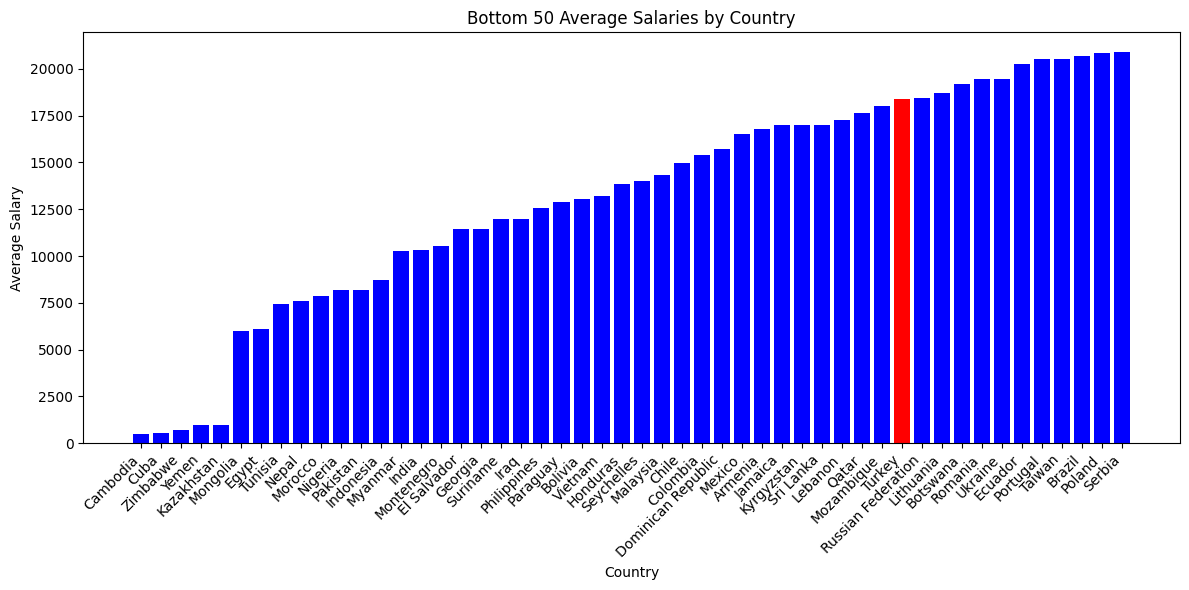

In [368]:
# Calculate the number of occurrences (counts) of each country in the 'Country' column
country_counts = num_vars['Country'].value_counts().head(50)

# Sort countries by average salary in ascending order and select the top countries based on the count
sorted_bottom_countries = mean_salary_by_country.sort_values(by='Salary', ascending=True).head(len(country_counts))

# Highlight Turkey's data point by changing its color while keeping other countries as default color
default_color = 'blue'
highlight_color = 'red'
colors = [highlight_color if i == 38 else default_color for i in range(len(country_counts))]

# Create a bar plot to visually represent the bottom 50 countries with the lowest average salaries
import matplotlib.pyplot as plt  # Import the necessary library
plt.figure(figsize=(12, 6))  # Set the figure size for the plot
plt.bar(sorted_bottom_countries['Country'], sorted_bottom_countries['Salary'], color=colors)  # Create the bar plot with colored bars
plt.xlabel('Country')  # Set the label for the x-axis
plt.ylabel('Average Salary')  # Set the label for the y-axis
plt.title('Bottom 50 Average Salaries by Country')  # Set the title of the plot
plt.xticks(rotation=45, ha='right')  # Rotate and align the x-axis labels for better readability
plt.tight_layout()  # Adjust the layout for better spacing

# Display the created plot
plt.show()

It is sad Turkey has lots of coders but paid that less. Let's now breakdown in to different categories. It is time to look at the gender distribution.

### Question 2: Are There Relationships Between Gender Distribution, Work Arrangements, and Salary Patterns Among Developers in  Turkey? 

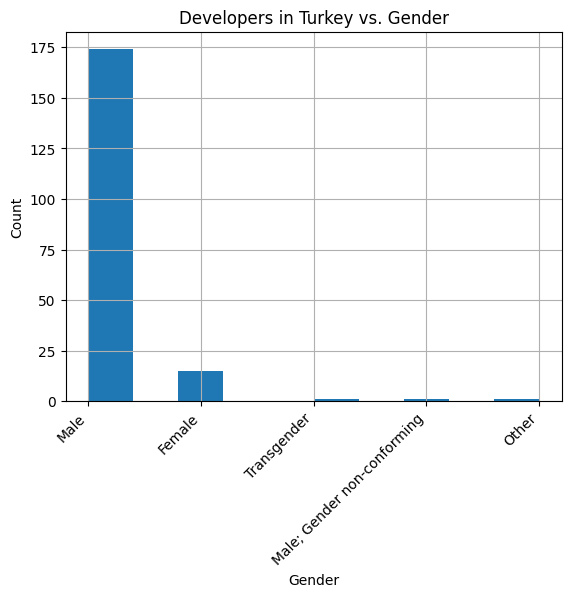

In [369]:
# Filter out the rows from the dataset where salaries are missing and the country is Turkey
gender_tur = num_vars[num_vars['Country'] == "Turkey"]

# Create a histogram to visualize the distribution of genders among developers in Turkey
import matplotlib.pyplot as plt  # Import the necessary library
gender_tur['Gender'].hist()  # Create a histogram using the 'Gender' column data
plt.xlabel('Gender')  # Set the label for the x-axis
plt.ylabel('Count')  # Set the label for the y-axis
plt.xticks(rotation=45, ha='right')  # Rotate and align the x-axis labels for better readability
plt.title('Developers in Turkey vs. Gender')  # Set the title of the plot
plt.show()  # Display the created histogram

Things are getting worse. Certainly, there is something should be improved at least women contributors should be higher.

In [370]:
#General view of Table (Column and Row)
gender_tur.shape

(363, 5)

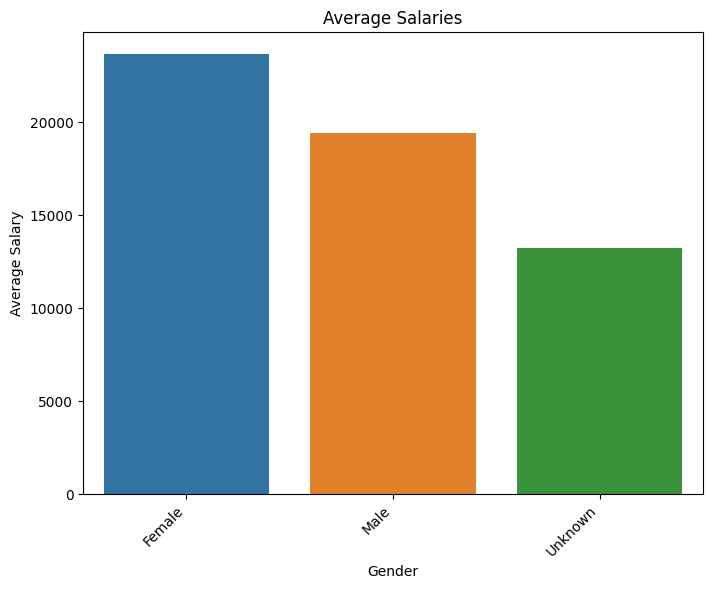

In [371]:
#This part is implemented to make visualization better and sum gender in more general gategories.

# List of terms to be replaced and their corresponding replacements
terms_to_replace = ['Other', 'Gender non-conforming', 'non-conforming', 'Transgender']
replacement_terms = ['Other', 'Gender non-conforming', 'non-conforming', 'Transgender']

# Define a function to replace certain terms in the Gender column for better analysis
def replace_terms(text):
    if isinstance(text, str):
        for i, term in enumerate(terms_to_replace):
            if term in text:
                return replacement_terms[i]
                break
    return text

# Create a copy of the dataset for visualization purposes
df_visualization = gender_tur.copy()

# Apply the replacement function to the Gender column
df_visualization['Gender'] = df_visualization['Gender'].apply(replace_terms)

# Fill NaN values in the Gender column with 'Unknown'
df_visualization['Gender'].fillna('Unknown', inplace=True)

# Calculate the average salaries by gender after filtering out NaN values
average_salary_by_gender = df_visualization.dropna().groupby('Gender')['Salary'].mean().reset_index()

plt.figure(figsize=(8, 6))  # Set the figure size for the plot
sns.barplot(data=average_salary_by_gender, x='Gender', y='Salary')  # Create the bar plot using seaborn
plt.title('Average Salaries')  # Set the title of the plot
plt.xticks(rotation=45, ha='right')  # Rotate and align the x-axis labels for better readability
plt.xlabel('Gender')  # Set the label for the x-axis
plt.ylabel('Average Salary')  # Set the label for the y-axis
plt.show()  # Display the created bar plot


Do we know anything about employment status?

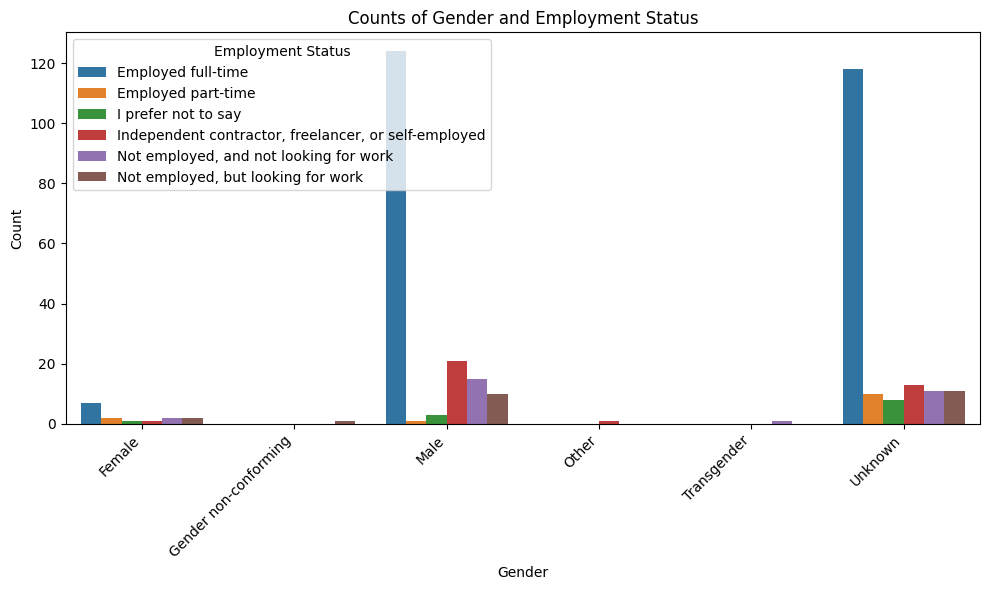

In [372]:
# Group the data by both Gender and EmploymentStatus and calculate the count for each group
grouped_data = df_visualization.groupby(['Gender', 'EmploymentStatus']).size().reset_index(name='Count')

# Create a bar plot to visualize the counts of Gender and Employment Status
plt.figure(figsize=(10, 6))  # Set the figure size for the plot

# Create the bar plot using seaborn, considering Gender and hue-based differentiation for EmploymentStatus
sns.barplot(data=grouped_data, x='Gender', y='Count', hue='EmploymentStatus')

plt.title('Counts of Gender and Employment Status')  # Set the title of the plot
plt.xlabel('Gender')  # Set the label for the x-axis
plt.ylabel('Count')  # Set the label for the y-axis
plt.xticks(rotation=45, ha='right')  # Rotate and align the x-axis labels for better readability
plt.legend(title='Employment Status')  # Add legend with title for Employment Status
plt.tight_layout()  # Adjust the layout for better spacing
plt.show()  # Display the created bar plot


Most of the coders in Turkey, works full time. Independent Contractors, freelencars follow them. 

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


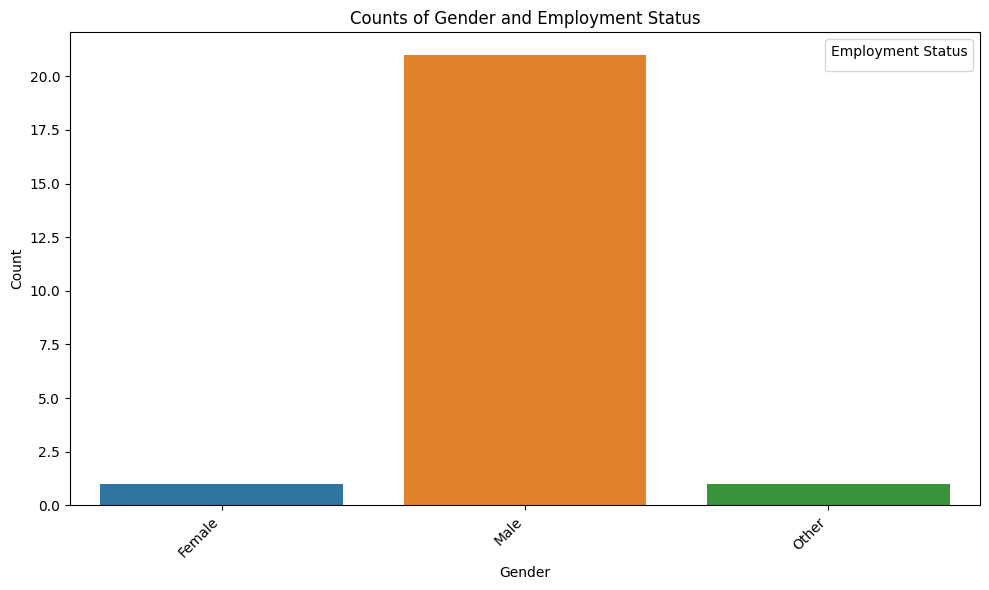

In [373]:
# Filter the data for developers in Turkey who are Independent contractors, freelancers, or self-employed
gender_part_tur = gender_tur[gender_tur['EmploymentStatus'] == "Independent contractor, freelancer, or self-employed"]

# Group the filtered data by Gender and calculate the count for each gender group
grouped_data = gender_part_tur.groupby(['Gender']).size().reset_index(name='Count')

# Create a bar plot to visualize the counts of Gender in the self-employed employment status
plt.figure(figsize=(10, 6))  # Set the figure size for the plot

# Create the bar plot using seaborn to show the counts of Gender
sns.barplot(data=grouped_data, x='Gender', y='Count')

plt.title('Counts of Gender and Employment Status')  # Set the title of the plot
plt.xlabel('Gender')  # Set the label for the x-axis
plt.ylabel('Count')  # Set the label for the y-axis
plt.xticks(rotation=45, ha='right')  # Rotate and align the x-axis labels for better readability
plt.legend(title='Employment Status')  # Note: No legend is needed since only one Employment Status is considered
plt.tight_layout()  # Adjust the layout for better spacing
plt.show()  # Display the created bar plot

Again, within freelancers and independent contractors, there is a male domination.

### Question 3: How Effective Mindsets on Job Satisfaction? Are There Mindset Patterns of Successful Individuals in Turkey?

In an effort to understand the key drivers of Job Satisfaction in the country, we delve into the Stack Overflow 2017 Survey data. By examining the survey responses, we aim to uncover any prevalent mindset traits that might contribute to the achievements and job satisfaction of individuals in various fields. Through this exploration, we seek to shed light on the measured factors in survey that play a role in fostering success within the Turkish context.

First, by conducting a search within Stack Overflow Schema CSV file, I identified questions that could reveal individuals' mindsets. Then, I created an additional dataframe by listing the columns that I believed reflected personality traits. In this way, I ended up with a dataset comprising multiple inputs and an output (JobSatisfaction).

In [374]:
Output_name = 'JobSatisfaction'
df_satifsaction = df[df['Country'] == "Turkey"]
df_satifsaction2 = df_satifsaction[df_satifsaction['EmploymentStatus'] == "Employed full-time"]
work_env = df_satifsaction2[['Salary','HoursPerWeek','ChangeWorld','ChallengeMyself', 'ProblemSolving', 'Overpaid','SeriousWork','CompetePeers','LearningNewTech', Output_name]]

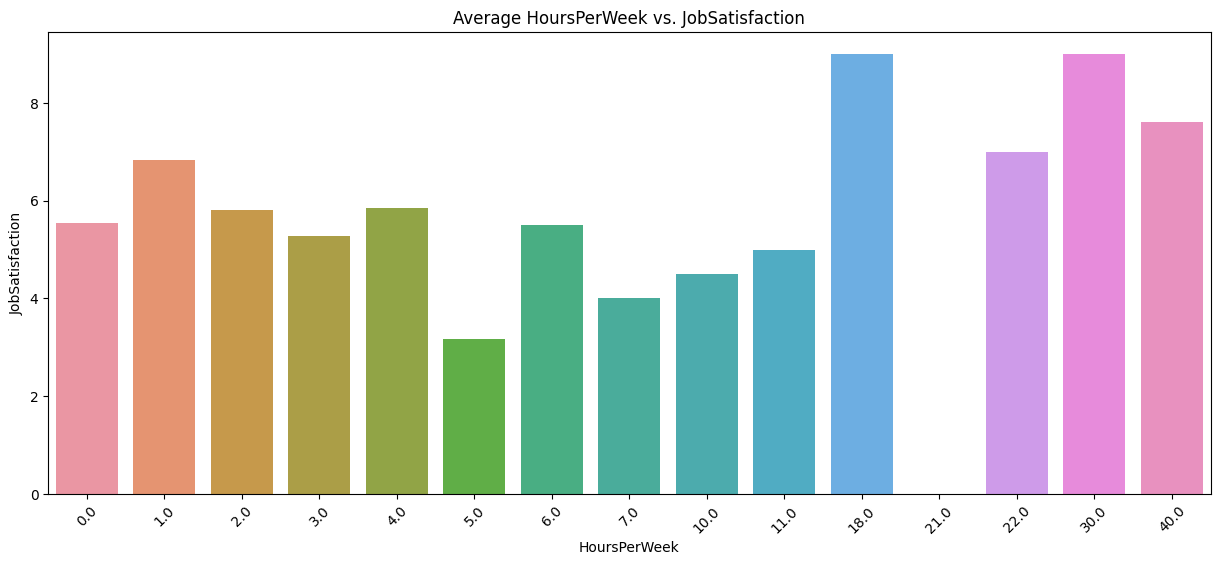

In [375]:
# Calculate the average JobSatisfaction for each value of HoursPerWeek
average_salaries = work_env.groupby('HoursPerWeek')['JobSatisfaction'].mean().reset_index()

# Create a bar plot using Seaborn to visualize the relationship between HoursPerWeek and JobSatisfaction
plt.figure(figsize=(15, 6))  # Set the figure size for the plot

# Create the bar plot using Seaborn, where x-axis represents HoursPerWeek and y-axis represents JobSatisfaction
sns.barplot(x='HoursPerWeek', y='JobSatisfaction', data=average_salaries)

plt.xlabel('HoursPerWeek')  # Set the label for the x-axis
plt.ylabel('JobSatisfaction')  # Set the label for the y-axis

# Set the title of the plot using a dynamic string
plt.title('Average ' + str('HoursPerWeek') + ' vs. ' + str('JobSatisfaction'))

plt.xticks(rotation=45)  # Rotate the category names on the x-axis for better readability
plt.show()  # Display the created bar plot

Results show that ful time employers wants to work around 18-30. Edges reduces the Job satisfaction.

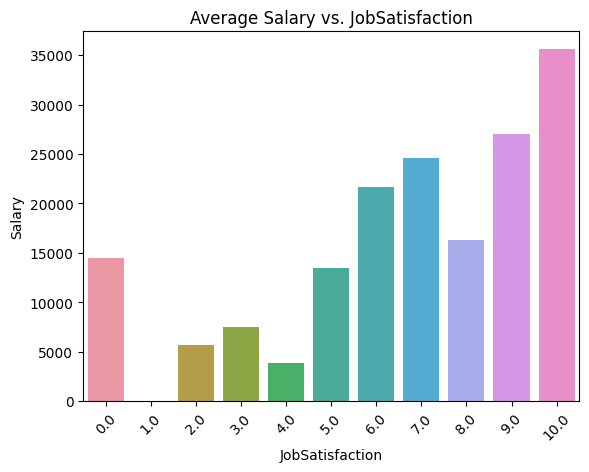

In [376]:
# Calculate the average Salary for each level of JobSatisfaction
average_salaries = work_env.groupby('JobSatisfaction')['Salary'].mean().reset_index()

# Create a bar plot using Seaborn to visualize the relationship between JobSatisfaction and Salary
sns.barplot(x='JobSatisfaction', y='Salary', data=average_salaries)  # Create the bar plot using Seaborn

plt.xlabel('JobSatisfaction')  # Set the label for the x-axis
plt.ylabel('Salary')  # Set the label for the y-axis

# Set the title of the plot using a dynamic string
plt.title('Average ' + str('Salary') + ' vs. ' + str('JobSatisfaction'))

plt.xticks(rotation=45)  # Rotate the category names on the x-axis for better readability
plt.show()  # Display the created bar plot

As we expected, higher salaries, gives higher job satisfaction.

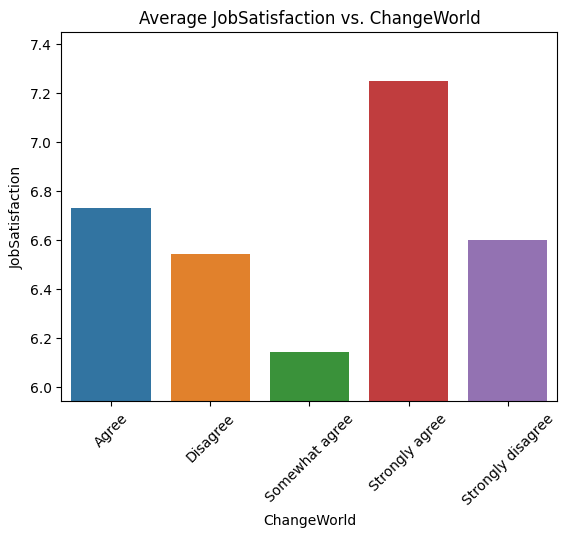

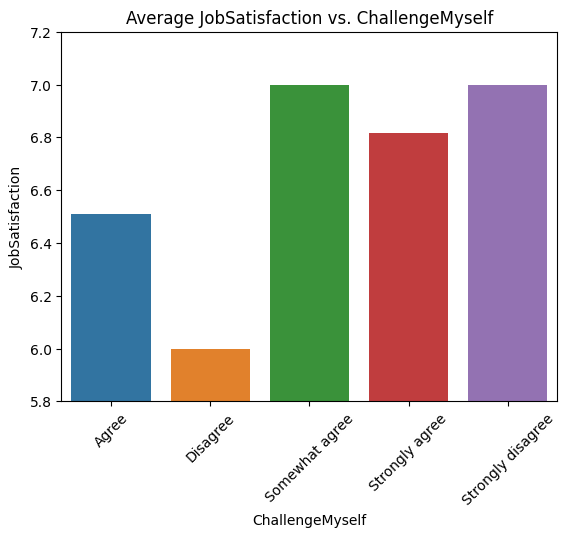

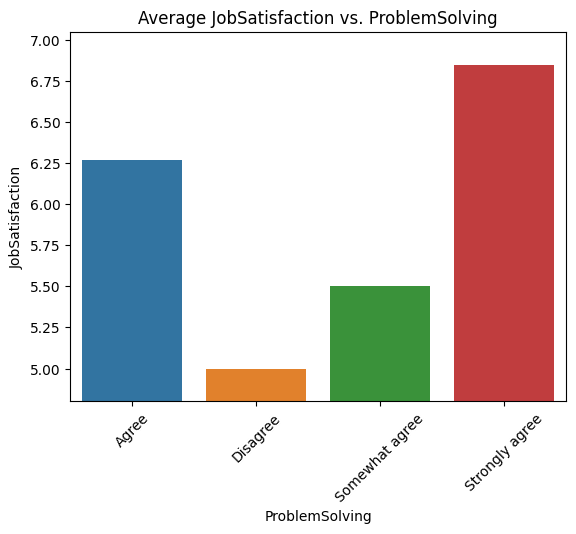

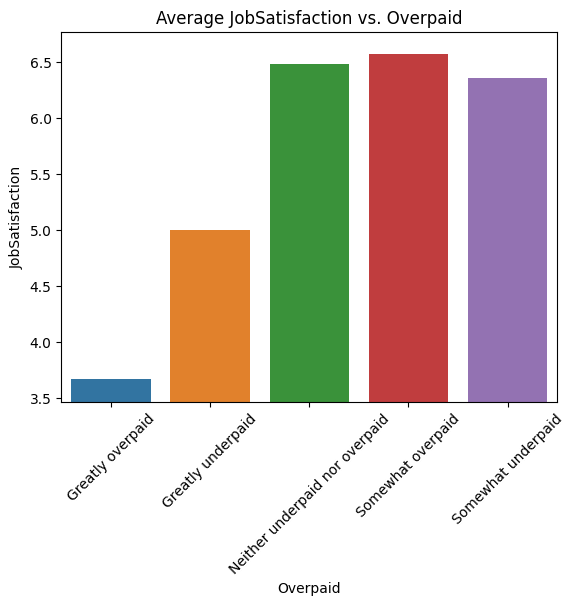

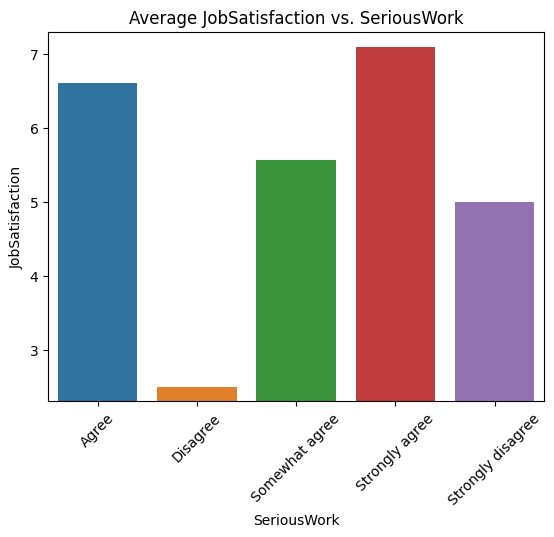

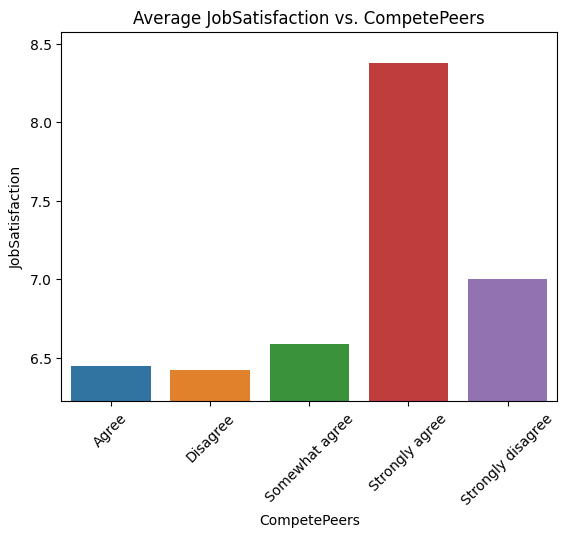

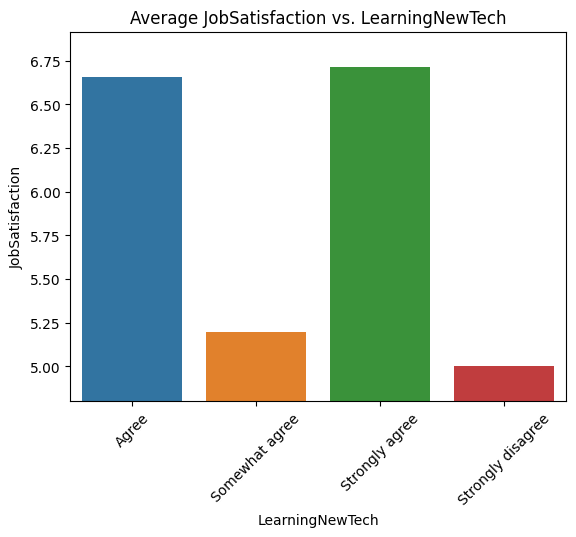

In [377]:
# Select columns with categorical data from the work environment dataset
cat_df = work_env.select_dtypes(include=['object']).copy()

# Iterate through each categorical column and create bar plots for Average JobSatisfaction vs. Categorical Feature
for column_name in cat_df.columns:
    # Calculate the average JobSatisfaction for each value of the current categorical column
    average_salaries = work_env.groupby(column_name)[Output_name].mean().reset_index()
    
    # Create a bar plot using Seaborn to visualize the relationship between the current categorical column and JobSatisfaction
    ax = sns.barplot(x=column_name, y=Output_name, data=average_salaries)  # Create the bar plot using Seaborn
    
    plt.xlabel(column_name)  # Set the label for the x-axis
    plt.ylabel(Output_name)  # Set the label for the y-axis
    
    # Set the y-axis limits to include a small margin above and below the data range
    ax.set_ylim([average_salaries[Output_name].min() - 0.2, average_salaries[Output_name].max() + 0.2])
    
    # Set the title of the plot using a dynamic string
    plt.title('Average ' + str(Output_name) + ' vs. ' + str(column_name))
    
    plt.xticks(rotation=45)  # Rotate the category names on the x-axis for better readability
    plt.show()  # Display the created bar plot


After conducting an analysis, I examined the parameters influencing job satisfaction and arrived at the following conclusions. 
* The factor **'ChangeWorld'** exhibited a **positive impact** on job satisfaction, indicating that individuals who find opportunities to make a difference tend to have higher job satisfaction levels.
*  the attribute **'ChallengeMyself'** emerged as significantly important, suggesting that those who actively **seek challenges and push their boundaries tend to experience greater job satisfaction**. 
* **'ProblemSolving'** was found to have a **positive effect** on job satisfaction, implying that individuals who engage in effective problem-solving activities tend to report higher job satisfaction. 
* The influence of **'OverPaid'** which was marked as an important factor with **both positive and negative aspects**, implying that an optimal compensation balance can impact job satisfaction. 
* The factor **'SeriousWork'** indicated a **positive impact**, implying that individuals who value and engage in meaningful, focused work tend to experience higher job satisfaction. 
* **'CompetePeers'** emerged as a **negative factor**, suggesting that a competitive environment among peers does not contribute to increased job satisfaction. 
* Lastly, **'LearningNewTech'** was identified as a **positive influence**, indicating that staying updated with new technologies positively affects job satisfaction levels.

In [378]:
# Define a function to create dummy variables for categorical columns
def create_dummy_df(df, cat_cols, dummy_na):
    for col in cat_cols:
        try:
            # Concatenate the original dataframe with dummy variables and drop the original categorical column
            df = pd.concat([df.drop(col, axis=1), pd.get_dummies(df[col], prefix=col, prefix_sep='_', drop_first=True, dummy_na=dummy_na)], axis=1)
        except:
            continue
    return df

# Define a function to convert salary to binary classes based on a threshold
def convert_salary_to_class(salary, threshold):
    return 1 if salary >= threshold else 0

# Define a function to clean the data, fit a logistic regression model, and evaluate its performance
def clean_fit_logistic_mod(df, response_col, cat_cols, dummy_na, salary_threshold, test_size=.3, rand_state=42):
    # Drop rows with missing values in the response column
    df = df.dropna(subset=[response_col], axis=0)
    
    # Drop columns with all missing values
    df = df.dropna(how='all', axis=1)
    
    # Create dummy variables for categorical columns
    df = create_dummy_df(df, cat_cols, dummy_na)
    
    # Fill missing values with column means
    fill_mean = lambda col: col.fillna(col.mean())
    df = df.apply(fill_mean, axis=0)
    
    # Prepare features (X) and target (y) variables
    X = df.drop(response_col, axis=1)
    y = df[response_col].apply(lambda salary: convert_salary_to_class(salary, salary_threshold))  # Convert to binary classes
    
    # Split data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=rand_state)
    
    # Initialize and fit a logistic regression model
    log_model = LogisticRegression(max_iter=10000)
    log_model.fit(X_train, y_train)
    
    # Predict target values for testing and training sets
    y_test_preds = log_model.predict(X_test)
    y_train_preds = log_model.predict(X_train)
    
    # Calculate accuracy scores
    test_accuracy = accuracy_score(y_test, y_test_preds)
    train_accuracy = accuracy_score(y_train, y_train_preds)
    
    # Calculate confusion matrix
    confusion_mat = confusion_matrix(y_test, y_test_preds)
    
    return test_accuracy, train_accuracy, log_model, X_train, X_test, y_train, y_test, confusion_mat


Default Job Satisfaction Threshold: 6.47
Accuracy on Training Data: 63.35%
Accuracy on Test Data: 53.62%


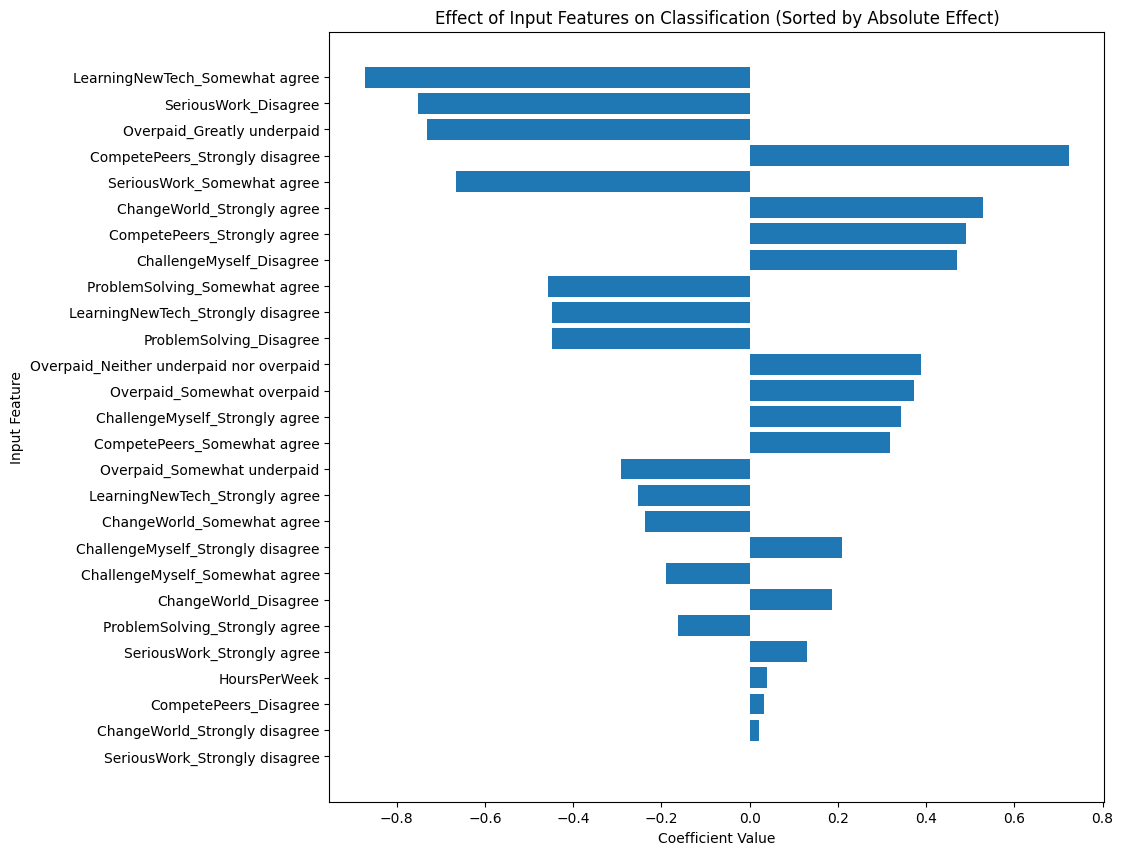

In [379]:
#Select columns with categorical data
cat_df = work_env.select_dtypes(include=['object']).copy()

# Drop the 'Salary' column from the dataset
work_env = work_env.drop(['Salary'], axis=1)

#Calculate the average salary as the default threshold
threshold = work_env[Output_name].mean()
print("Default Job Satisfaction Threshold: {:.2f}".format(threshold))

#Perform logistic regression classification using the defined function
test_accuracy, train_accuracy, log_model, X_train, X_test, y_train, y_test, confusion_mat = clean_fit_logistic_mod(
    work_env, Output_name, cat_df, dummy_na=False, salary_threshold=threshold)

# Define class labels for binary classification
class_labels = ["Below Threshold", "Above Threshold"]

#Print accuracy metrics
print("Accuracy on Training Data: {:.2f}%".format(train_accuracy * 100))
print("Accuracy on Test Data: {:.2f}%".format(test_accuracy * 100))

#Visualize the effect of input categories using model coefficients
coefs = log_model.coef_[0]
feature_names = X_train.columns

# Sort indices based on the absolute effect of coefficients
sorted_indices = np.argsort(np.abs(coefs))

plt.figure(figsize=(10, 10))
plt.barh(np.array(feature_names)[sorted_indices], coefs[sorted_indices])
plt.xlabel("Coefficient Value")
plt.ylabel("Job Satisfaction Effects")
plt.title("Effect of Input Features on Classification (Sorted by Absolute Effect)")
plt.show()


In [380]:
Output_name = 'JobSatisfaction'
df_satifsaction = df[df['Country'] == "United States"]
df_satifsaction2 = df_satifsaction[df_satifsaction['EmploymentStatus'] == "Employed full-time"]
work_env = df_satifsaction2[['HoursPerWeek','ChangeWorld','ChallengeMyself', 'ProblemSolving', 'Overpaid','SeriousWork','CompetePeers','LearningNewTech', Output_name]]

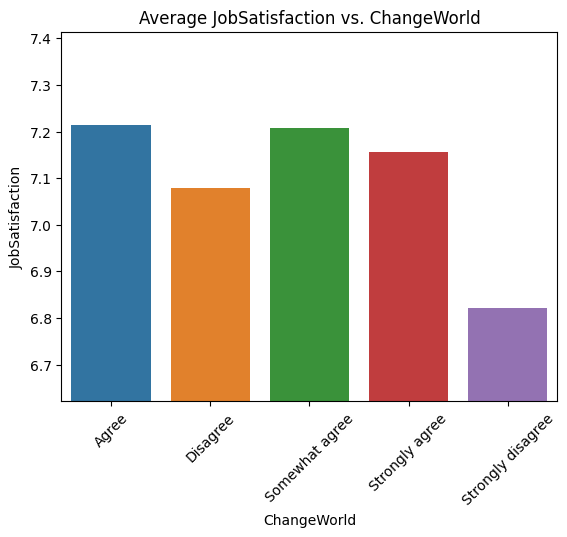

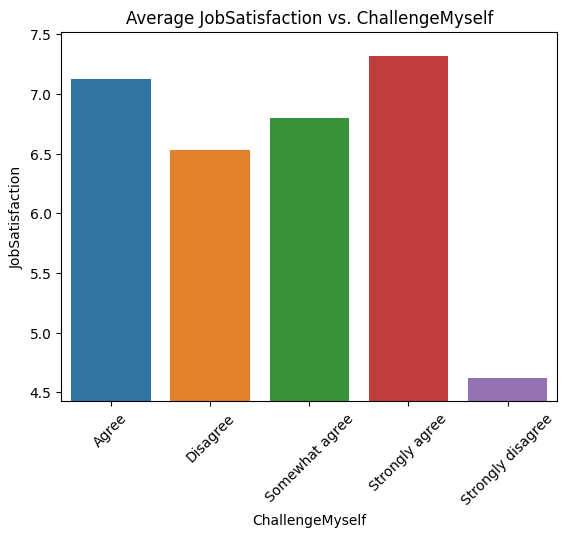

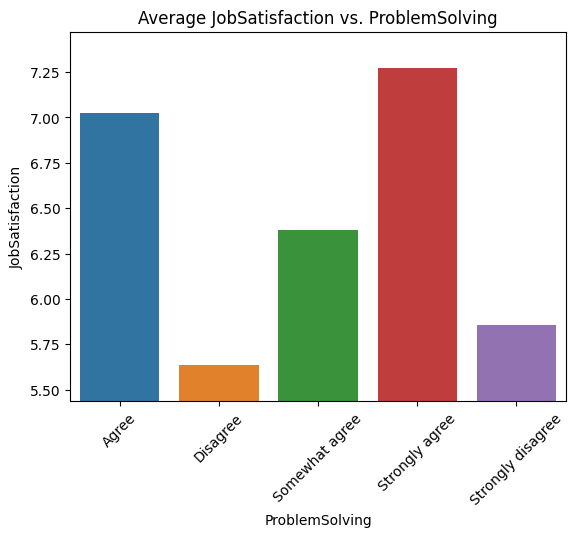

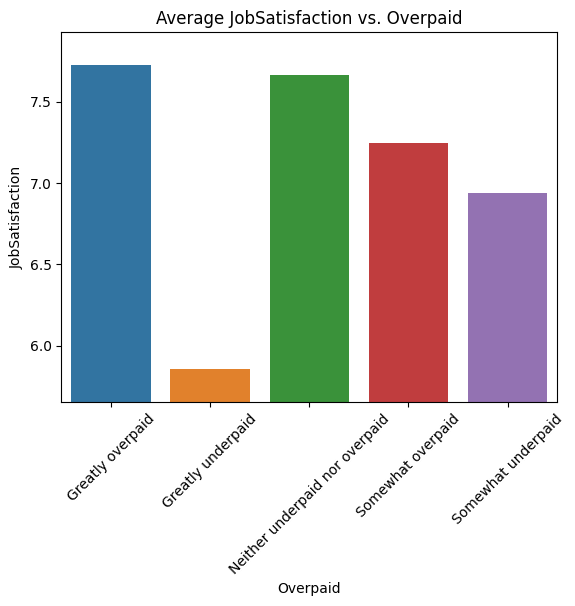

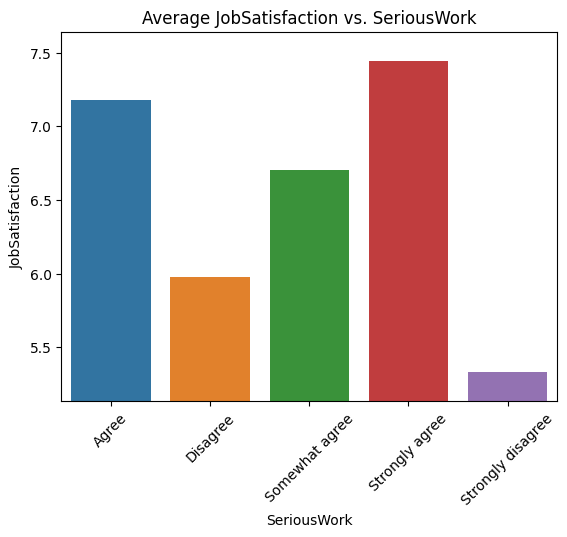

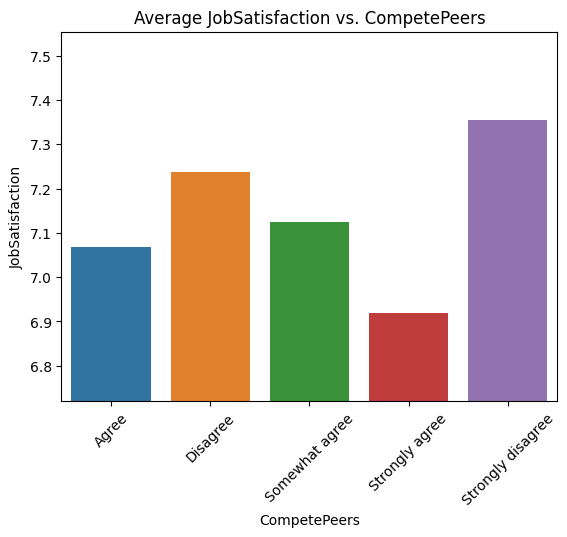

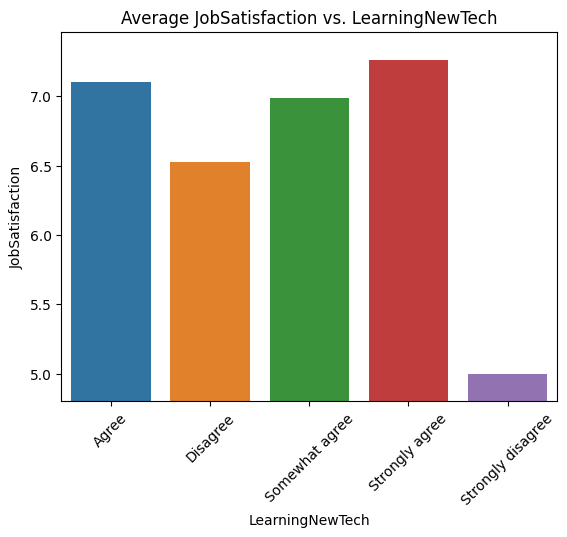

In [381]:
#Select columns with categorical data
cat_df = work_env.select_dtypes(include=['object']).copy()

#Iterate through each categorical column and analyze the relationship between categories and the output
for column_name in cat_df.columns:
    # Calculate the average output (e.g., JobSatisfaction) for each category of the current categorical column
    average_salaries = work_env.groupby(column_name)[Output_name].mean().reset_index()
    
    # Create a bar plot using Seaborn to visualize the relationship between categories and the output
    ax = sns.barplot(x=column_name, y=Output_name, data=average_salaries)  # Create the bar plot using Seaborn
    
    plt.xlabel(column_name)  # Set the label for the x-axis
    plt.ylabel(Output_name)  # Set the label for the y-axis
    
    # Set the y-axis limits to include a small margin above and below the data range
    ax.set_ylim([average_salaries[Output_name].min() - 0.2, average_salaries[Output_name].max() + 0.2])
    
    # Set the title of the plot using a dynamic string
    plt.title('Average ' + str(Output_name) + ' vs. ' + str(column_name))
    
    plt.xticks(rotation=45)  # Rotate the category names on the x-axis for better readability
    plt.show()  # Display the created bar plot


In analysis on United States, edges disappear and CallengeMyself becomes positive effect. This concludes to same result.

Default Job Satisfaction Threshold: 7.18
Accuracy on Training Data: 59.70%
Accuracy on Test Data: 56.83%


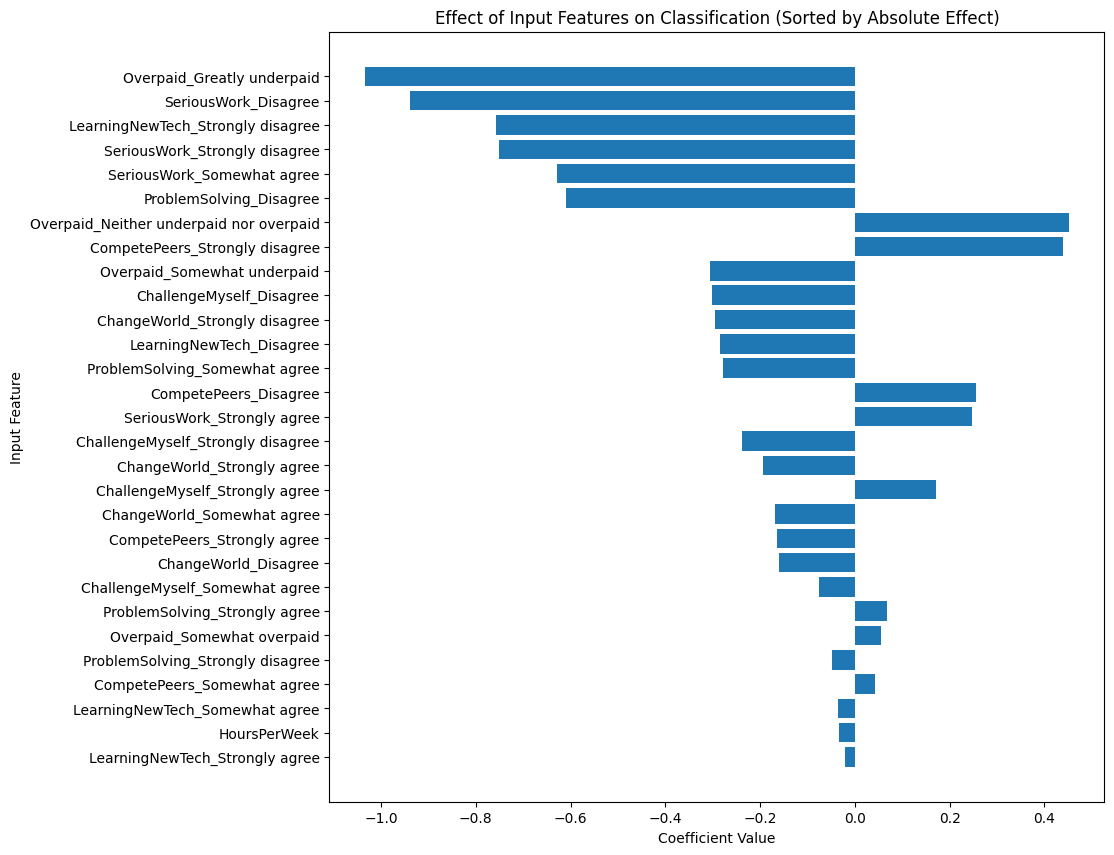

In [382]:

#Select categorical columns
cat_df = work_env.select_dtypes(include=['object']).copy()

#Calculate the average salary as the default threshold
threshold = work_env[Output_name].mean()
print("Default Job Satisfaction Threshold: {:.2f}".format(threshold))

#Perform logistic regression classification
test_accuracy, train_accuracy, log_model, X_train, X_test, y_train, y_test, confusion_mat = clean_fit_logistic_mod(
    work_env, Output_name, cat_df, dummy_na=False, salary_threshold=threshold)

class_labels = ["Below Threshold", "Above Threshold"]


#Print accuracy metrics
print("Accuracy on Training Data: {:.2f}%".format(train_accuracy * 100))
print("Accuracy on Test Data: {:.2f}%".format(test_accuracy * 100))

#Visualize effect of input categories using model coefficients
coefs = log_model.coef_[0]
feature_names = X_train.columns

# Sort indices based on the absolute effect
sorted_indices = np.argsort(np.abs(coefs))

plt.figure(figsize=(10, 10))
plt.barh(np.array(feature_names)[sorted_indices], coefs[sorted_indices])
plt.xlabel("Coefficient Value")
plt.ylabel("Job Satisfaction Effects")
plt.title("Effect of Input Features on Classification (Sorted by Absolute Effect)")
plt.show()


## Conlusion
* Despite Turkey showing promise in terms of future contributions compared to other countries, it stands out as one of the countries **lagging** behind globally in terms of average salaries. Additionally, a significant portion of the workforce in Turkey consists of salaried employees, distinguishing it from some other countries.

* Similar to worldwide trends, **gender distribution in Turkey is not equal**. The industry is predominantly male-oriented. Finally, there isn't a significant gender-based wage disparity, but this assessment **should be approached cautiously**. This is due to the fact that in the examined country, Turkey, non-male orientations have an **imbalanced representation** in the dataset. It's evident that more data collection is necessary for more robust evaluations.

* To have a strong job satisfaction, we expect you to receive the salary you deserve, perceive your job as requiring seriousness, be open to learning new technologies, and enjoy problem-solving. Additionally, being in competition with your colleagues seems to significantly reduce your job satisfaction. On the other hand, setting ambitious goals and having aspirations to change the world appear to enhance your job satisfaction. When all these results are examined, they seem consistent with one another. This is because individuals with such a mindset are anticipated to lead successful and fulfilling lives in the present day.